In [1]:
import random
import math
import numpy as np

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer


IBMQ.load_account()


Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbs

import smc
Distribution = smc.Distribution

sbs.set(style="darkgrid")

%matplotlib inline

In [3]:
x = smc.Distribution(n_points=10, n_qubits=1)

In [4]:
print(x.weights)
x.measure([0], [1])
print(x.weights)


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.10946068 0.09642938 0.09220517 0.09192985 0.10039881 0.10779847
 0.09497081 0.10489569 0.10183907 0.10007206]


In [5]:
x.measure([1], [0])
print(x.n_eff())
print(x.calc_bayes_mean())
sbs.scatterplot(x.points[:,0],
                x.points[:,1],
                size=x.weights,
                sizes=(20, 200),
                hue=x.weights)

9.880312655183767
[0.12251024 0.13069788]


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [21]:
x.weights

0.0007972213795959318

In [269]:
x.calc_bayes_mean()

array([0.45552533, 0.52258018])

In [165]:
x.measure([0], [1])

In [153]:
x.next_experiment()

array([0])

In [166]:
x.calc_bayes_mean()

array([0.28083989, 0.53565931])

In [65]:
x.calc_covariance_matrix()

array([[ 0.04871971,  0.00431097, -0.00668147,  0.00139055],
       [ 0.00431097,  0.08225738, -0.00511159,  0.00073838],
       [-0.00668147, -0.00511159,  0.0552927 ,  0.00401144],
       [ 0.00139055,  0.00073838,  0.00401144,  0.06350277]])

In [65]:
# Currently without resampling
n_measurements = 100
n_experiments = 1
n_points = 4000
n_qubits = 1

true_bias = [np.random.random(2) for _ in range(n_qubits)]
print(true_bias)

[array([0.86424265, 0.54177206])]


In [63]:
def fake_experiment(true_bias, inversion_arr):
    result = []
    for bias, i in zip(true_bias, inversion_arr):
        outcome = i if random.random() < bias[i] else 1 - i
        result.append(outcome)
    return result

In [64]:
# Currently without resampling
n_qubits = 1
sample = Distribution(n_points=n_points, n_qubits=n_qubits)
true_bias = [np.random.random(2) for _ in range(n_qubits)]

bme = []

for j in range(n_measurements):
    
        outcome = fake_experiment(true_bias, [0] * n_qubits)
        sample.measure(outcome, [0])
        
#         outcome = fake_experiment(true_bias, [1] * n_qubits)
#         sample.measure(outcome, [1])
        
        bme.append(sample.calc_bayes_mean())
bme = np.array(bme)

In [69]:
# Currently without resampling
n_qubits = 2
samples = [Distribution(n_points=n_points, n_qubits=n_qubits) for _ in range(n_experiments)]

#true_bias = [np.random.random(2) for _ in range(n_qubits)]
true_bias = [[0.01, 0.05], [0.01, 0.05]]

for j in range(n_measurements):
    for i in range(n_experiments):
        
        # Perform a biased measurement

        outcome = fake_experiment(true_bias, [0] * n_qubits)
        samples[i].measure(outcome, [0]*n_qubits)
        
        outcome = fake_experiment(true_bias, [1] * n_qubits)
        samples[i].measure(outcome, [1]*n_qubits)
        
print(samples[i].calc_bayes_mean())
print(true_bias)

[0.01806402 0.05084992 0.01839625 0.05855043]
[[0.01, 0.05], [0.01, 0.05]]


In [672]:
samples[0].calc_bayes_mean()
true_bias

[array([0.54184823, 0.25644179])]

In [668]:
true_bias = [[0.01, 0.05], [0.04, 0.08]]

In [71]:
n_points = 4000
n_measurement = 100
n_qubits = 2
samples = [Distribution(n_points=n_points, n_qubits=n_qubits) for _ in range(n_experiments)]

prox = []

for j in range(n_measurements):
    prox.append([])
    for i in range(n_experiments):
        
        experiment = samples[i].next_experiment()
        
        outcome = fake_experiment(true_bias, experiment)
        
        samples[i].measure(outcome, experiment)

print(samples[0].calc_bayes_mean())
print(true_bias)

[0.04127709 0.11216757 0.01559801 0.11293835]
[[0.01, 0.05], [0.01, 0.05]]


In [133]:
samples[0].calc_bayes_mean()

array([0.50225471, 0.49346598])

In [135]:
samples[0].resample()

In [137]:
samples[0].n_eff()

999.9999999999848

Text(0, 0.5, 'Log Bayes Risk')

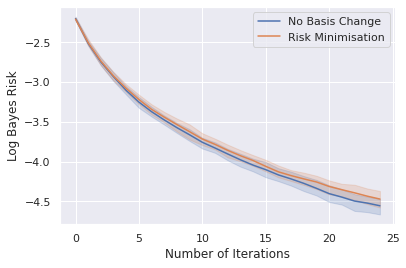

In [11]:
lplot_x = np.array([n_experiments * [i] for i in range(n_measurements)]).flatten()

plt.plot()
sbs.lineplot(lplot_x, np.log(prox.flatten()), ci=100, label="No Basis Change")
sbs.lineplot(lplot_x, np.log(prox_inv.flatten()), ci=100, label="Risk Minimisation")
plt.xlabel('Number of Iterations')
plt.ylabel('Log Bayes Risk')

Text(0, 0.5, 'Log Bayes Risk')

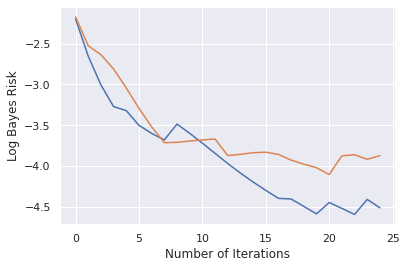

In [12]:
plt.plot(np.log(prox[:,1]), label="No Basis Change")
plt.plot(np.log(prox_inv[:,1]), label="Risk Minimisation")
plt.xlabel('Number of Iterations')
plt.ylabel('Log Bayes Risk')

In [14]:
print(samples[4].calc_bayes_mean())
print(true_bias)

[0.75949058 0.09143131]
[0.65167789 0.15333367]


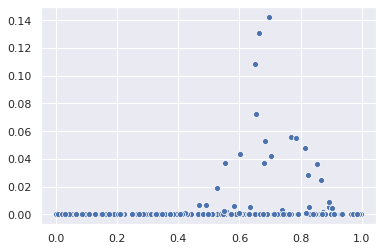

In [15]:
sbs.scatterplot(samples[2].points[:,0], samples[2].weights)

In [16]:
# Using Qiskit
# Simulation Only
simulator = Aer.get_backend('qasm_simulator')

In [23]:
job = execute(circuit, simulator, shots=1)

In [24]:
job.result().get_counts(circuit)

{'01': 1}

In [14]:
n_qubits = 1
i = 4
circuit = QuantumCircuit(n_qubits, n_qubits)
for _ in range(i):
    circuit.x(0)
    circuit.barrier(0)
circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
print(circuit.draw(output='latex_source'))

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 2, img_depth = 11
\usepackage[size=custom,height=10,width=22,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}
\begin{equation*}
    \Qcircuit @C=1.0em @R=0.0em @!R {
	 	\lstick{ {q}_{0} :  } & \gate{X} \barrier[0em]{0} & \qw & \gate{X} \barrier[0em]{0} & \qw & \gate{X} \barrier[0em]{0} & \qw & \gate{X} \barrier[0em]{0} & \qw & \meter & \qw & \qw\\
	 	\lstick{c_{0}: } & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw \cwx[-1] & \cw & \cw\\
	 }
\end{equation*}

\end{document}


In [685]:
def design_circuit(n_qubits, inv_arr, circuit=None):
    
    if circuit is None:
        circuit = QuantumCircuit(n_qubits, n_qubits)
    
    for i, element in enumerate(inv_arr):
        if element == 1:
            circuit.x(i)
    
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
    return circuit

In [ ]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_london')
# Currently without resampling
n_qubits = 2
samples = [Distribution(n_points=n_points, n_qubits=n_qubits) for _ in range(n_experiments)]

#true_bias = [np.random.random(2) for _ in range(n_qubits)]
#true_bias = [[0.01, 0.05], [0.01, 0.05]]

for j in range(n_measurements):
    for i in range(n_experiments):
        
        # Perform a biased measurement

        outcome = fake_experiment(true_bias, [0] * n_qubits)
        samples[i].measure(outcome, [0])
        
        outcome = fake_experiment(true_bias, [1] * n_qubits)
        samples[i].measure(outcome, [1])
        
print(samples[i].calc_bayes_mean())
print(true_bias)

In [689]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_armonk')


n_measurements = 100
n_experiments = 10
n_points = 8000
n_qubits = 1
samples = [Distribution(n_points=n_points, n_qubits=n_qubits) for _ in range(n_experiments)]

prox = []

for j in range(n_measurements):
    prox.append([])
    for i in range(n_experiments):
        
        inversion_arr = samples[i].next_experiment()
        circuit = design_circuit(n_qubits, inversion_arr)
        
        job = execute(circuit, backend, shots=1)
        result = job.result()
        outcome = list(map(int, list(list(result.get_counts(circuit).keys())[0])))     
        print("Measurements: {} Outcome: {}".format(inversion_arr, outcome))
        samples[i].measure(outcome, inversion_arr)

        prox[j].append([samples[i].calc_bayes_mean(), samples[i].calc_bayes_risk())
    print("Measurement {} completed!".format(j))

Measurements: [0] Outcome: [0]
Measurement 0 completed!
Measurements: [1] Outcome: [1]
Measurement 1 completed!
Measurements: [1] Outcome: [1]
Measurement 2 completed!
Measurements: [0] Outcome: [1]
Measurement 3 completed!
Measurements: [0] Outcome: [1]
Measurement 4 completed!
Measurements: [0] Outcome: [1]
Measurement 5 completed!
Measurements: [0] Outcome: [0]
Measurement 6 completed!
Measurements: [0] Outcome: [0]
Measurement 7 completed!
Measurements: [1] Outcome: [1]
Measurement 8 completed!
Measurements: [0] Outcome: [0]
Measurement 9 completed!
Measurements: [1] Outcome: [1]
Measurement 10 completed!
Measurements: [0] Outcome: [1]
Measurement 11 completed!
Measurements: [0] Outcome: [1]
Measurement 12 completed!
Measurements: [0] Outcome: [0]
Measurement 13 completed!
Measurements: [1] Outcome: [1]
Measurement 14 completed!
Measurements: [0] Outcome: [0]
Measurement 15 completed!
Measurements: [1] Outcome: [1]
Measurement 16 completed!
Measurements: [0] Outcome: [1]
Measuremen

[[array([0.16451629, 0.12580804])],
 [array([0.16271025, 0.16723977])],
 [array([0.16196792, 0.18789046])],
 [array([0.14982083, 0.17872086])],
 [array([0.14589621, 0.17873537])],
 [array([0.14191233, 0.17873366])],
 [array([0.16627042, 0.17884474])],
 [array([0.18140992, 0.17838642])],
 [array([0.18083891, 0.19150576])],
 [array([0.19135569, 0.19098418])],
 [array([0.19084162, 0.19982174])],
 [array([0.18895839, 0.19994244])],
 [array([0.18703064, 0.20006189])],
 [array([0.19560332, 0.1995495 ])],
 [array([0.19512187, 0.2058881 ])],
 [array([0.19218908, 0.19465868])],
 [array([0.19166906, 0.19963887])],
 [array([0.19022464, 0.19976066])],
 [array([0.19646288, 0.19924122])],
 [array([0.20184698, 0.19876569])]]

In [74]:
job = execute(circuit, backend, shots=1)

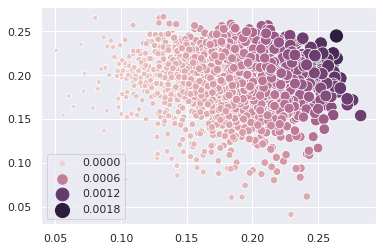

In [690]:
sbs.scatterplot(samples[0].points[:,0],
                samples[0].points[:,1],
                size=samples[0].weights,
                sizes=(20, 200),
                hue=samples[0].weights)

In [51]:
s = samples[0]

In [121]:
s.calc_bayes_mean()

array([0.48896966, 0.67450741])